In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
des = pd.read_excel('./UnitProcess_Groups_Baselines_colors.xlsx', sheet_name='UP_Categories')
ori = pd.read_excel('./UnitProcess_Groups_Baselines_colors.xlsx', sheet_name='Sheet5')
ori = ori[['up_name','Train Category','up_tc','css_color3']]
des = des[['UnitName','UP']]

In [17]:
joined = ori.merge(des, left_on='up_name', right_on='UP', how='right')
#joined.to_csv('./joined_color.csv', index=False)

In [8]:
joined = pd.read_csv('./joined_color.csv')

In [9]:
var_name = "Total Capital Investment (TCI)"
df = pd.read_csv('./seawater_baseline.csv')
sys_df = df[df["Unit Process Name"] != "System"]
sys_df = sys_df[sys_df["Variable"] == var_name]

In [29]:
palette = []
ls = sys_df['Unit Process Name'].unique()
ls.sort()
for up in ls:
    c = joined[joined['UnitName']==up]['css_color3'].values[0].replace(' ','')
    palette.append(c)

In [33]:
palette

['#917C51',
 '#917C51',
 '#33FFFF',
 '#FFEE33',
 '#917C51',
 '#8EFFBC',
 '#8EFFBC',
 '#917C51',
 '#917C51',
 '#9EFF33',
 '#9EFF33',
 '#FF3333',
 '#917C51',
 '#917C51',
 '#FFEE33',
 '#9EFF33',
 '#ABFF8E',
 '#ABFF8E',
 '#ABFF8E',
 '#516291',
 '#917C51',
 '#FF3333',
 '#9433FF',
 '#9EFF33',
 '#FFEE33',
 '#8CFF33']

In [30]:
test = sys_df.pivot(index='Case Study', columns='Unit Process Name', values='Value')

In [31]:
test

Unit Process Name,ammonia_addition,anti_scalant_addition,backwash_solids_handling,cartridge_filtration,caustic_soda_addition,chlorination,chlorination_b,co2_addition,ferric_chloride_addition,holding_tank,...,reverse_osmosis,ro_first_pass,ro_second_pass,static_mixer,sulfuric_acid_addition,surface_discharge,sw_onshore_intake,treated_storage,tri_media_filtration,uv_aop
Case Study,,,,,,,,,,,,,,,,,,,,,
santa_barbara,NaN,0.068,0.002,2.603,NaN,5.206,NaN,1.199,1.648,1.481,...,11.156,NaN,NaN,0.116,NaN,3.070,2.009,0.545,NaN,4.976
tampa_bay,0.604,NaN,6.285,7.585,1.341,9.266,7.677,NaN,2.954,NaN,...,NaN,56.742,12.901,0.116,0.231,13.365,10.217,7.951,8.068,NaN


Text(0.5, 1.0, '%s Among Different Case Studies')

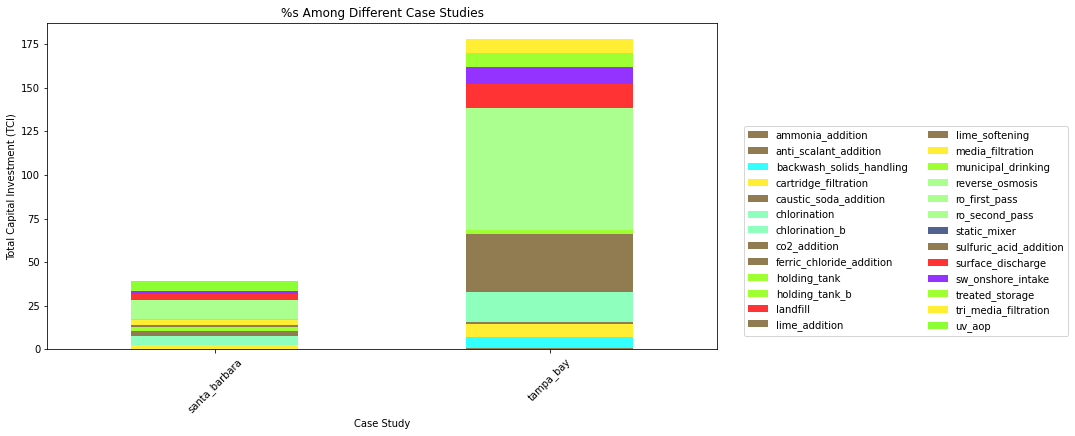

In [32]:
test = sys_df.pivot(index='Case Study', columns='Unit Process Name', values='Value')
fig, ax = plt.subplots(figsize=(12,6))
test.plot(ax=ax, kind='bar',stacked=True, color=palette)
ax.legend(ncol=2,loc=(1.04,0.04))
plt.ylabel(var_name)
plt.xticks(rotation=45)
plt.title('%s Among Different Case Studies')